In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Splitting Data into train and test datasets

In [20]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

# EDA

In [21]:
y_test.shape

(10000,)

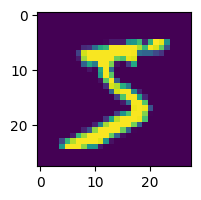

In [22]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

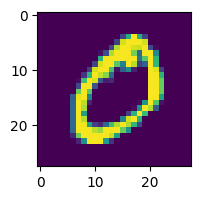

In [23]:
plt.figure(figsize=(15,2))

plt.imshow(X_train[1])

In [24]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [25]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# Reshaping and scaling train and test datasets

In [26]:
X_train=X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [27]:
X_train=X_train/255
X_test=X_test/255
X_train.shape

(60000, 28, 28, 1)

# Training CNN Model

In [28]:
cnn=keras.Sequential([
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D(2,2),    

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1547 - accuracy: 0.9522
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0511 - accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0363 - accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0273 - accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0218 - accuracy: 0.9927
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0166 - accuracy: 0.9949
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0142 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0116 - accuracy: 0.9961
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0096 - accuracy: 0.9968
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - los

In [29]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0363 - accuracy: 0.9906


[0.03628033027052879, 0.9905999898910522]

# Classification Report

In [30]:
from sklearn.metrics import classification_report
y_pred=cnn.predict(X_test)
y_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_classes))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [31]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [32]:
X_train=X_train/255
X_test=X_test/255
X_train.shape

(60000, 28, 28)

# Training ANN Model

In [33]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2669 - accuracy: 0.9246
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1196 - accuracy: 0.9648
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0837 - accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0644 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0512 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0401 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0334 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0274 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0223 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.018

# Classification Report

In [34]:
y_pred=model.predict(X_test)
y_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [35]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]